In [106]:
#Linear Regression: Student Performance dataset:

##importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##importing data
df=pd.read_csv("student_performance_dataset.csv")
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [107]:
##creating new df with only important var.
df=df[["Gender","Study_Hours_per_Week","Attendance_Rate","Past_Exam_Scores","Parental_Education_Level","Internet_Access_at_Home","Extracurricular_Activities","Final_Exam_Score"]]
df

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score
0,Male,31,68.267841,86,High School,Yes,Yes,63
1,Male,16,78.222927,73,PhD,No,No,50
2,Female,21,87.525096,74,PhD,Yes,No,55
3,Female,27,92.076483,99,Bachelors,No,No,65
4,Female,37,98.655517,63,Masters,No,Yes,70
...,...,...,...,...,...,...,...,...
703,Male,14,84.658761,78,PhD,Yes,No,50
704,Male,35,60.278990,83,Masters,No,No,62
705,Male,25,98.384969,75,Bachelors,Yes,No,57
706,Female,21,96.148012,84,Bachelors,Yes,No,65


In [108]:
#endocoding categorical values to numerical values
label_encoder=LabelEncoder()
df["Gender"]=label_encoder.fit_transform(df["Gender"])
df["Parental_Education_Level"]=label_encoder.fit_transform(df["Parental_Education_Level"])
df["Internet_Access_at_Home"]=label_encoder.fit_transform(df["Internet_Access_at_Home"])
df["Extracurricular_Activities"]=label_encoder.fit_transform(df["Extracurricular_Activities"])
df

#ordinal vs categorical...order values

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score
0,1,31,68.267841,86,1,1,1,63
1,1,16,78.222927,73,3,0,0,50
2,0,21,87.525096,74,3,1,0,55
3,0,27,92.076483,99,0,0,0,65
4,0,37,98.655517,63,2,0,1,70
...,...,...,...,...,...,...,...,...
703,1,14,84.658761,78,3,1,0,50
704,1,35,60.278990,83,2,0,0,62
705,1,25,98.384969,75,0,1,0,57
706,0,21,96.148012,84,0,1,0,65


In [109]:
##cleaning data()
df=df.dropna()
df=df.drop_duplicates()
print("\n")
print("\n")
print(df.isnull().sum())
df.info()
df.describe()







Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 707
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      500 non-null    int32  
 1   Study_Hours_per_Week        500 non-null    int64  
 2   Attendance_Rate             500 non-null    float64
 3   Past_Exam_Scores            500 non-null    int64  
 4   Parental_Education_Level    500 non-null    int32  
 5   Internet_Access_at_Home     500 non-null    int32  
 6   Extracurricular_Activities  500 non-null    int32  
 7   Final_Exam_Score            500 non-null    int64  
dtypes: float64(1), int32(4), int64(3)
memory usage: 27.3 

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.488000,25.184000,75.830689,75.218000,1.464000,0.474000,0.464000,56.378000
std,0.500357,8.804384,13.969186,14.442841,1.114984,0.499824,0.499202,6.266551
min,0.000000,10.000000,50.116970,50.000000,0.000000,0.000000,0.000000,50.000000
25%,0.000000,18.000000,64.959340,62.000000,0.000000,0.000000,0.000000,50.000000
50%,0.000000,26.000000,76.752661,75.500000,1.000000,0.000000,0.000000,55.000000
75%,1.000000,33.000000,87.548861,88.000000,2.000000,1.000000,1.000000,61.000000
max,1.000000,39.000000,99.967675,100.000000,3.000000,1.000000,1.000000,77.000000


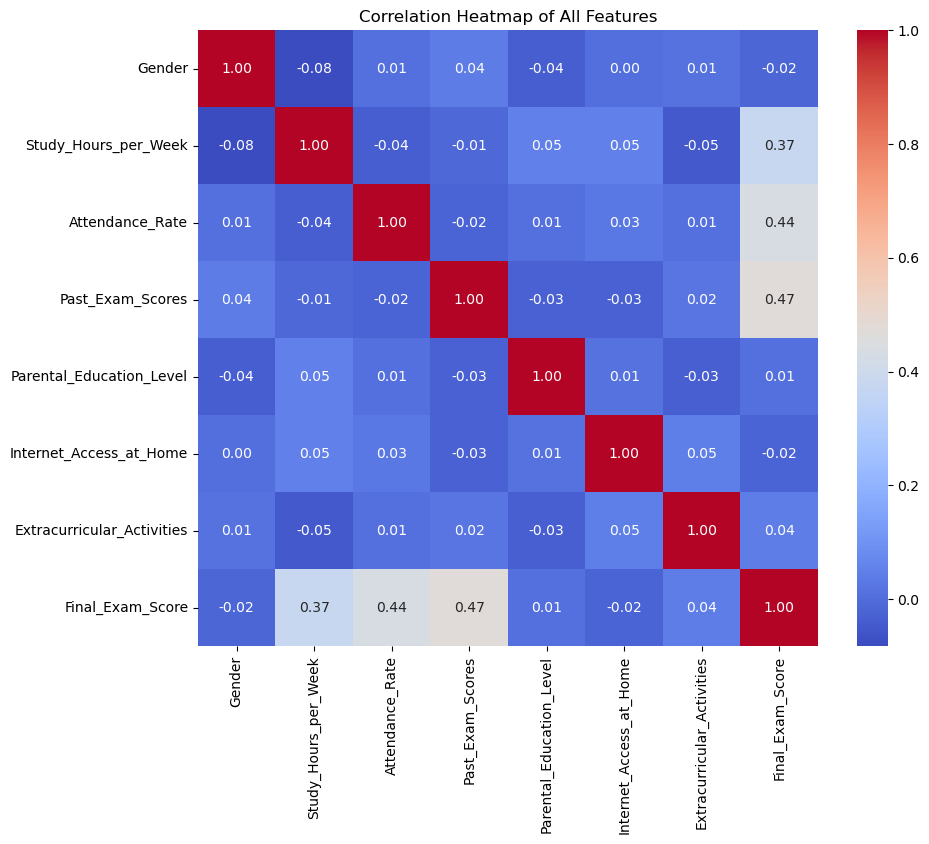

In [110]:
#Checking for collinearity.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of All Features")
plt.show()

In [111]:
#Computing z-scores
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
z_scores = np.abs(stats.zscore(df[num_cols]))
z_score_threshold = 3

#Counting outliers per feature
outlier_counts = (z_scores > z_score_threshold).sum(axis=0)
print("Number of outliers per numeric column (|z| > 3):\n")
print(outlier_counts)

Number of outliers per numeric column (|z| > 3):

Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              2
dtype: int64


In [112]:
##splitting data
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("\n")
print("x_train:\n",x_train.head())
print("y_train:\n",y_train.head())




x_train:
      Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
294       1                    33        95.775684                89   
582       1                    12        93.175907                66   
19        0                    39        85.197307                62   
402       1                    25        95.028615                65   
417       0                    28        58.336538                51   

     Parental_Education_Level  Internet_Access_at_Home  \
294                         2                        1   
582                         3                        0   
19                          3                        1   
402                         2                        1   
417                         0                        0   

     Extracurricular_Activities  
294                           0  
582                           0  
19                            0  
402                           1  
417                           0  
y_

In [113]:
#standardizing training data

col_to_scale=["Gender","Study_Hours_per_Week","Attendance_Rate","Past_Exam_Scores","Parental_Education_Level"]
s_scaler=StandardScaler()

x_train[col_to_scale]=s_scaler.fit_transform(x_train[col_to_scale])
x_test[col_to_scale]=s_scaler.transform(x_test[col_to_scale])
x_train.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities
294,1.067257,0.853246,1.422129,0.974384,0.431122,1,0
582,1.067257,-1.477573,1.232346,-0.632703,1.329294,0,0
19,-0.936981,1.519195,0.649911,-0.912197,1.329294,1,0
402,1.067257,-0.034685,1.367593,-0.702577,0.431122,1,1
417,-0.936981,0.298289,-1.310915,-1.680804,-1.365221,0,0


In [114]:
##training model:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [115]:
##making the prediction:
y_pred=lr.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 3.06
Mean Squared Error (MSE): 14.40
Root Mean Squared Error (RMSE): 3.79
R² Score: 0.5647


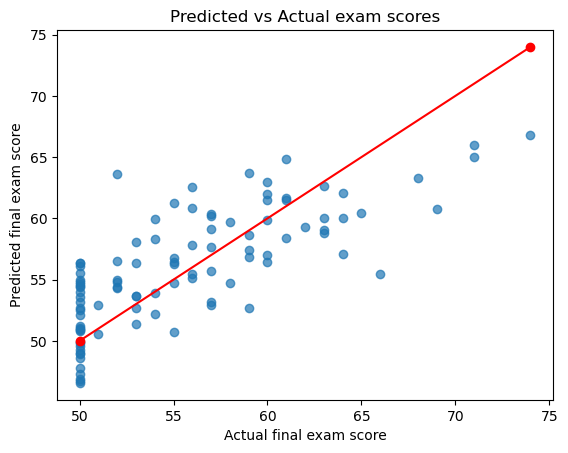

In [116]:
##predicted vs actual plot
plt.scatter(y_test,y_pred, alpha=0.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],
         color="red",
         marker="o")
plt.xlabel("Actual final exam score")
plt.ylabel("Predicted final exam score")
plt.title("Predicted vs Actual exam scores")
plt.show()

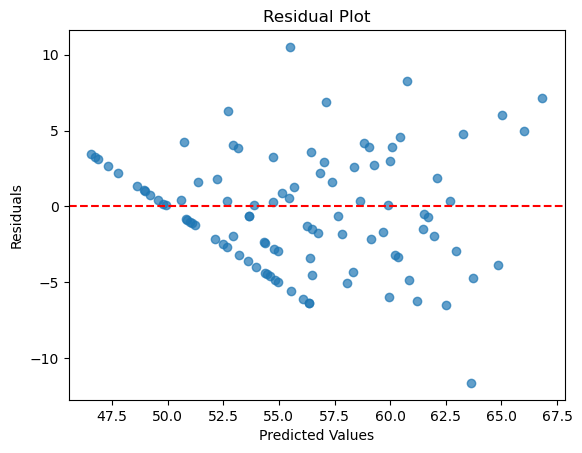

In [117]:
#residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

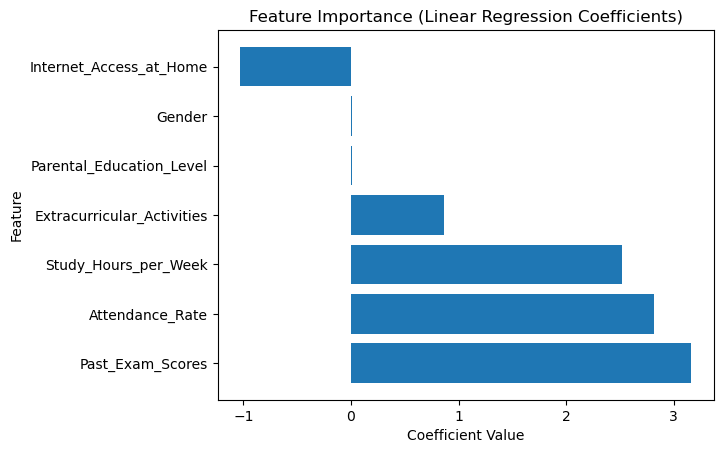

In [118]:
coeff_df = pd.DataFrame({
    "Feature": x_train.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.barh(coeff_df["Feature"], coeff_df["Coefficient"])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

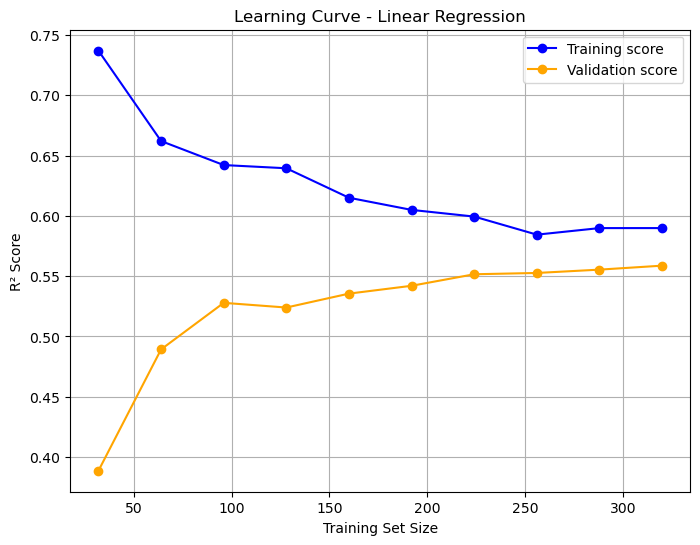

In [119]:


# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=lr,
    X=x_train,
    y=y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    scoring="r2"
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Validation score")

plt.title("Learning Curve - Linear Regression")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()
